In [1]:
import os
import datetime
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

## Single file

### Load and replace `-999.0` with `NaN`

In [2]:
ds = xr.open_dataset('ECHAP_PM2.5_D1K_2013001_V3.nc')

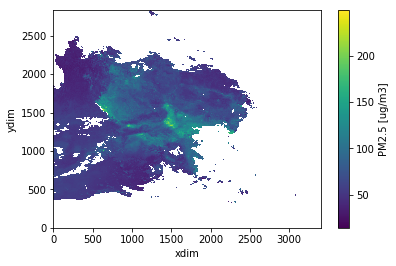

In [3]:
ds.where(ds['PM2.5'] != -999.0)['PM2.5'].plot()

In [4]:
ds = ds.swap_dims({'ydim':'Lat','xdim':'Lon'}).reset_coords(drop=True)

In [5]:
ds_masked = ds.where(ds['PM2.5'] != -999.0)

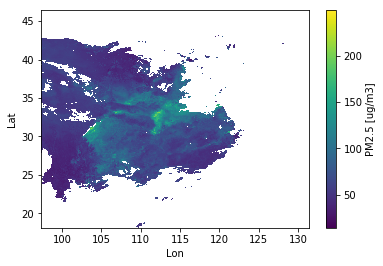

In [6]:
ds_masked['PM2.5'].plot()

### Map

In [7]:
import cartopy

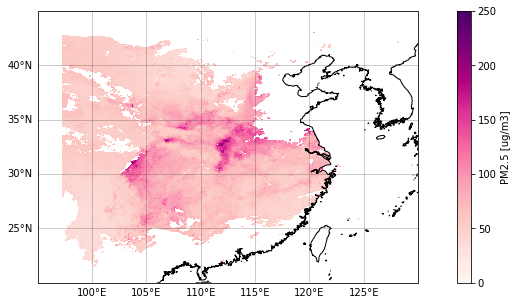

In [8]:
plt.figure(figsize=(14,5))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([95, 130, 20, 45], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'))
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.top_labels = False
gl.right_labels = False

p =  ds_masked['PM2.5'].plot(ax=ax, x='Lon', y='Lat', vmin=0, vmax=250, cmap='RdPu',
                             transform=cartopy.crs.PlateCarree())

plt.show()

### Loading multiple files

In [15]:
ls ECHAP_PM2.5_D1K_*

ECHAP_PM2.5_D1K_2013001_V3.nc  ECHAP_PM2.5_D1K_2013004_V3.nc
ECHAP_PM2.5_D1K_2013002_V3.nc  ECHAP_PM2.5_D1K_2013005_V3.nc
ECHAP_PM2.5_D1K_2013003_V3.nc


In [9]:
def preprocess(_ds):
    name = os.path.basename(_ds.encoding['source'])
    yr = int(name[16:20])
    day = int(name[20:23])
    _ds['time'] = datetime.datetime(yr, 1, 1) + datetime.timedelta(day - 1)
    return _ds

In [10]:
ds = xr.open_mfdataset('ECHAP_PM2.5_D1K_*.nc',preprocess=preprocess,concat_dim='time')

In [11]:
# Assuming coordinates are the same for each time, we can pick first time 
ds['Lat'] = ds.Lat.isel(time=0)
ds['Lon'] = ds.Lon.isel(time=0)
ds = ds.swap_dims({'ydim':'Lat','xdim':'Lon'}).reset_coords(drop=True)

In [12]:
# Replace -999.0 to NaN
ds_masked = ds.where(ds['PM2.5'] != -999.0)

### Map
Should be the same map as above but now we need to subselect the dataset for the first time point

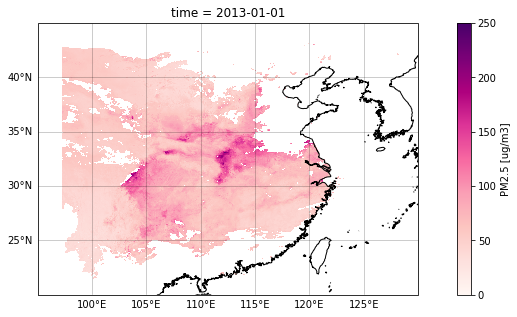

In [13]:
plt.figure(figsize=(14,5))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([95, 130, 20, 45], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'))
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.top_labels = False
gl.right_labels = False

p =  ds_masked.isel(time=0)['PM2.5'].plot(ax=ax, x='Lon', y='Lat', vmin=0, vmax=250, cmap='RdPu',
                                          transform=cartopy.crs.PlateCarree())

plt.show()

Compare to last time point

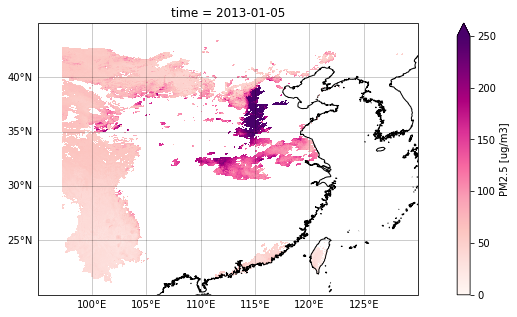

In [14]:
plt.figure(figsize=(14,5))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([95, 130, 20, 45], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'))
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.top_labels = False
gl.right_labels = False

p =  ds_masked.isel(time=-1)['PM2.5'].plot(ax=ax, x='Lon', y='Lat', vmin=0, vmax=250, cmap='RdPu',
                                          transform=cartopy.crs.PlateCarree())

plt.show()